In [1]:
import pandas as pd
import cufflinks as cf
import chart_studio.plotly as py
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import numpy as np
from numpy.random import gamma
from numpy.random import multivariate_normal
from scipy.stats import multivariate_t
from scipy.stats import f
import matplotlib.pyplot as plt



cf.go_offline(connected = True)

In [182]:
df = pd.read_csv('물품_계약_구성업체_내역.csv')

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning:

Columns (2,6,9,10,12,16,17,18,30,31,34,35) have mixed types.Specify dtype option on import or set low_memory=False.



In [183]:
df['대표물품분류번호']

0         30109904.0
1         30109902.0
2         60109899.0
3         60109899.0
4         30152001.0
             ...    
274919           NaN
274920           NaN
274921           NaN
274922           NaN
274923           NaN
Name: 대표물품분류번호, Length: 274924, dtype: float64

In [184]:
idx  =[j for j,i in enumerate(df['대표물품분류번호']) if str(i)[0:2] == str(43)]

In [185]:
df_2 = df.iloc[idx].copy()

In [186]:
df_2.columns

Index(['등록유형', '조달구분', '공고시스템명', '계약구분', '계약번호', '계약변경차수', '최종계약여부', '수요기관명',
       '수요기관코드', '수요기관구분', '수요기관지역명', '계약건명', '계약방법', '대표물품분류번호', '대표품명',
       '대표세부물품분류번호', '대표세부품명', '다수공급자계약여부', '우수제품여부', '최초계약일자', '최초계약금액',
       '계약일자', '계약수량', '계약금액', '증감계약수량', '증감계약금액', '공동계약이행방식', '지분율', '업체명',
       '업체사업자등록번호', '업체기업구분명', '입찰공고번호', '입찰공고차수', '입찰계약방법', '낙찰자결정방법',
       '초년도계약번호', '장기계약차수', '장기계속계약여부'],
      dtype='object')

In [187]:
b = ['계약변경차수','최초계약금액','계약수량','계약금액','증감계약수량','증감계약금액','지분율','입찰공고차수','장기계약차수']

In [188]:
df_2['계약구분'].unique()

array(['제3자단가', '총액계약', '단가계약'], dtype=object)

In [189]:
df_2['계약방법'].unique()

array(['수의계약', '일반경쟁', '제한경쟁', '지명경쟁', nan], dtype=object)

In [190]:
# 입찰한 품목이 10개 이상인 기업이 차지하는 물품의 갯수
df_2['업체명'].value_counts()[df_2['업체명'].value_counts().values>10].values.sum()

3842

In [191]:
# 입찰한 품목이 10개 이상인 기업 수
len(df_2['업체명'].value_counts()[df_2['업체명'].value_counts().values>10])

198

In [192]:
len(df_2['업체명'].unique()) # 전체 unique 한 기업수
## 이를 통해서 6~7% 가 전체의 25%를 차지하고 있음을 알수 있다. 보고서의 내용과 거의 일치한다.

5515

In [193]:
# 전체 입찰된 물품 수
len(df_2['업체명'])

14825

In [194]:
df_2.columns

Index(['등록유형', '조달구분', '공고시스템명', '계약구분', '계약번호', '계약변경차수', '최종계약여부', '수요기관명',
       '수요기관코드', '수요기관구분', '수요기관지역명', '계약건명', '계약방법', '대표물품분류번호', '대표품명',
       '대표세부물품분류번호', '대표세부품명', '다수공급자계약여부', '우수제품여부', '최초계약일자', '최초계약금액',
       '계약일자', '계약수량', '계약금액', '증감계약수량', '증감계약금액', '공동계약이행방식', '지분율', '업체명',
       '업체사업자등록번호', '업체기업구분명', '입찰공고번호', '입찰공고차수', '입찰계약방법', '낙찰자결정방법',
       '초년도계약번호', '장기계약차수', '장기계속계약여부'],
      dtype='object')

In [195]:
df_2['업체명'].value_counts().iplot(kind = 'hist',title = '업체당 물품의 갯수에 따른 히스토그램')
# 매우 한쪽에 쏠려있음을 알 수 있다.

In [197]:
df_2['업체명'].value_counts()[df_2['업체명'].value_counts().values>10].keys().tolist()

['주식회사 에이텍',
 '영아이티 주식회사',
 '주식회사 후니테크',
 '(주)화진티엔아이',
 '대신네트웍스주식회사',
 '(주)다산소프트',
 '(주)컴트리',
 '(주)비츠코리아',
 '주식회사 태성에스엔이',
 '주식회사 한국에스리',
 '(주)삼보컴퓨터',
 '(주)대우루컴즈',
 '주식회사 트리엠',
 '(주)다산데이타',
 '(주)무하유',
 '주식회사케이티',
 '에이치피씨코리아(주)',
 '(주)아이티마야',
 '주식회사 주연테크',
 '주식회사 리퓨터',
 '주식회사 루트웰',
 '주식회사 빛나는교육',
 '주식회사 티원엘에스',
 '다인디지탈 주식회사',
 '주식회사 샌디아',
 '주식회사 디나텍',
 '(주)한울솔루션',
 '주식회사 엠텍정보',
 '에이씨앤티시스템',
 '(주)다나와컴퓨터',
 '(주)유니와이드테크놀러지',
 '(주)레드스톤시스템',
 '(주)폭스소프트',
 '위더스컴퓨터 주식회사',
 '(주)아이티윈',
 '링크정보시스템(주)',
 '(주)한국인프라',
 '(주) 한성',
 '삼성전자 주식회사',
 '주식회사 이씨오',
 '주식회사 에이치케이시스템',
 '주식회사 정원엔시스',
 '(주)알트소프트',
 '컴텍시스템',
 '주식회사 디에스앤지',
 '(주)포스텍',
 '(주)코코링크',
 '주식회사 퍼씨엠',
 '사단법인 나너우리',
 '지나인솔루션 주식회사',
 '주식회사 메이커스테크놀로지',
 '대신네트웍스 주식회사',
 '(주)경희정보테크',
 '(주)이노벤텍',
 '주식회사 성주컴텍',
 '주식회사 한성정보통신',
 '(주)닷넷소프트',
 '매스웍스코리아(유)',
 '아이티메인주식회사',
 '(주)제트코',
 '주식회사디케이이앤씨',
 '주식회사 슈퍼솔루션',
 '(주)위포',
 '주식회사 기린',
 '주식회사 에즈웰',
 '(주)대하테크',
 '(주)엠엘에스에스',
 '주식회사 엔와이컴퓨터',
 '(주)블루포트',
 '아이에스테크놀로지 주식회사',
 '(주)나브컴',
 '(주)더존비즈온',
 '아토즈씨앤텍（A

In [198]:
idx =  [i for i,j in enumerate(df_2['업체명']) if df_2.iloc[i]['업체명'] in df_2['업체명'].value_counts()[df_2['업체명'].value_counts().values>10].keys().tolist()]

In [199]:
df_2.iloc[idx].to_csv('독점.csv',encoding = 'cp949')

In [200]:
df_2['업체명'].value_counts()

주식회사 에이텍          99
영아이티 주식회사         65
주식회사 후니테크         54
(주)화진티엔아이         50
대신네트웍스주식회사        47
                  ..
주식회사 동양테크엘리베이터     1
대유산전               1
루씨엠 주식회사           1
(주)한국무빙월           1
(주)터보이엔지           1
Name: 업체명, Length: 5515, dtype: int64

In [201]:
df_2['업체명'].value_counts().keys()

Index(['주식회사 에이텍', '영아이티 주식회사', '주식회사 후니테크', '(주)화진티엔아이', '대신네트웍스주식회사',
       '(주)다산소프트', '(주)컴트리', '(주)비츠코리아', '주식회사 태성에스엔이', '주식회사 한국에스리',
       ...
       '주식회사 스마트네트웍스', '(주)유비온', '주식회사 피엠테크앤이엔티', '(주)알티스트', '우성브로텍',
       '주식회사 동양테크엘리베이터', '대유산전', '루씨엠 주식회사', '(주)한국무빙월', '(주)터보이엔지'],
      dtype='object', length=5515)

In [84]:
# 수치형만 (의미있는)
a = ['계약변경차수','최초계약금액','계약수량','계약금액','증감계약수량','증감계약금액','지분율','입찰공고차수','장기계약차수']

In [85]:
df_3 = df_2.loc[df_2['최종계약여부'] == 'Y',a].copy()
df_4 = df_2.loc[df_2['최종계약여부'] == 'Y',].copy()

In [86]:
df_3.head()

,계약변경차수,최초계약금액,계약수량,계약금액,증감계약수량,증감계약금액,지분율,입찰공고차수,장기계약차수
35,0,2.585970e+08,1.0,2.585970e+08,1.0,2.585970e+08,100.0,0.0,NaN
36,0,1.320000e+10,300.0,1.320000e+10,300.0,1.320000e+10,100.0,0.0,NaN
63,1,1.595000e+09,50.0,1.595000e+09,0.0,0.000000e+00,100.0,0.0,NaN
106,0,2.937000e+06,3.0,2.937000e+06,3.0,2.937000e+06,100.0,NaN,NaN
117,0,6.292000e+06,143.0,6.292000e+06,143.0,6.292000e+06,100.0,NaN,NaN


In [87]:
df_3.isnull().sum()

계약변경차수        0
최초계약금액        0
계약수량          0
계약금액          0
증감계약수량        0
증감계약금액        0
지분율           0
입찰공고차수     7032
장기계약차수    12229
dtype: int64

In [88]:
df_3.fillna(0,inplace = True)

In [89]:
df_3.cov()

,계약변경차수,최초계약금액,계약수량,계약금액,증감계약수량,증감계약금액,지분율,입찰공고차수,장기계약차수
계약변경차수,5.986514e+00,4.406154e+09,1.911000e+04,1.533613e+10,-1.602315e+04,4.109472e+08,2.890186e-01,3.222850e-01,1.247552e-03
최초계약금액,4.406154e+09,2.118615e+19,5.149628e+13,3.292729e+19,-1.801451e+13,7.895845e+18,-1.084844e+10,4.038408e+08,8.354458e+06
계약수량,1.911000e+04,5.149628e+13,8.418108e+11,1.316517e+14,8.288579e+11,-4.417354e+12,5.633838e+04,-1.735388e+03,-4.253224e+02
계약금액,1.533613e+10,3.292729e+19,1.316517e+14,1.226032e+20,-2.806548e+13,1.063778e+19,-1.038854e+10,1.019155e+09,4.733742e+06
증감계약수량,-1.602315e+04,-1.801451e+13,8.288579e+11,-2.806548e+13,8.594838e+11,-9.513495e+12,5.061983e+04,-4.132030e+03,-3.821519e+02
증감계약금액,4.109472e+08,7.895845e+18,-4.417354e+12,1.063778e+19,-9.513495e+12,8.013957e+18,-9.436607e+09,1.429320e+08,7.545771e+06
지분율,2.890186e-01,-1.084844e+10,5.633838e+04,-1.038854e+10,5.061983e+04,-9.436607e+09,8.737441e+01,4.989876e-02,-2.408605e-01
입찰공고차수,3.222850e-01,4.038408e+08,-1.735388e+03,1.019155e+09,-4.132030e+03,1.429320e+08,4.989876e-02,3.737266e-01,-9.910627e-04
장기계약차수,1.247552e-03,8.354458e+06,-4.253224e+02,4.733742e+06,-3.821519e+02,7.545771e+06,-2.408605e-01,-9.910627e-04,2.221031e-02


In [90]:
np.array(df_3).shape[0]

12290

In [91]:
np.array(df_3.agg(['mean']))

array([[3.74288039e-01, 5.97924326e+08, 4.58516183e+04, 9.89227877e+08,
        4.11975057e+04, 3.93881289e+08, 9.87713588e+01, 1.06834825e-01,
        9.27583401e-03]])

In [92]:
def t_square(data ,alpha: float = None):
    
    array_data = np.array(data)

    
    p = array_data.shape[1]
    m = array_data.shape[0]
    n = 1
    col_mean= np.array(df_3.agg(['mean']))
    mat_cov = data.cov()
    mat_inv_s = np.linalg.inv(mat_cov)  # inverse S
    
    values = []
    for sample in array_data:
        dif = sample - col_mean
        value = np.matmul(np.matmul(dif,mat_inv_s),dif.T).ravel().tolist()  # T-square
        values.append(value)
    
    LCL = 0
    UCL = ( ( p * (m+1) * (m-1) ) / (m * (m - p)) ) * f.ppf((1-alpha), p, m-p)
            
    return values, LCL, UCL 

In [93]:
t, lcl, ucl = t_square(df_3,0.05)


[[0.06917544915737729],
 [24.882082248040522],
 [0.29361547867505733],
 [0.0753932606958049],
 [0.07517181081528979],
 [0.07364038706212206],
 [0.7756036245422547],
 [0.07439088838670385],
 [0.538475278693291],
 [0.06930545985524676],
 [0.07490365392691725],
 [0.07443656181951393],
 [0.07549757309599421],
 [0.07334780454603407],
 [0.07301783415746912],
 [0.07501802042151345],
 [0.07537676772666124],
 [0.2171534492776812],
 [0.2183642047963672],
 [0.07483458112947923],
 [0.07481227501255443],
 [0.07369945981624475],
 [0.07511345505977089],
 [0.0743114130321307],
 [41.7011098237177],
 [67.2026090205611],
 [0.07401739087495474],
 [0.07482159411910952],
 [0.07489769904481265],
 [0.07536730710121671],
 [0.0716882134748319],
 [0.07492146245158852],
 [2.424151829486621],
 [0.07439546960282048],
 [0.07510170627714857],
 [0.0754599403811399],
 [0.0754357886128325],
 [0.07133953022357874],
 [0.07231449844956132],
 [0.07222787438786717],
 [0.07522958724870892],
 [0.07495895620449688],
 [0.0746118

In [95]:
t = pd.DataFrame(t)

In [96]:
t.values.ravel()

array([ 0.06917545, 24.88208225,  0.29361548, ...,  0.07540197,
        0.07538648,  0.07426527])

In [97]:
idx_2 = [i for i,j in enumerate(t.values.ravel()) if j > ucl]

In [98]:
df_3.reset_index().iloc[idx_2,1:]

,계약변경차수,최초계약금액,계약수량,계약금액,증감계약수량,증감계약금액,지분율,입찰공고차수,장기계약차수
1,0,1.320000e+10,300.0,1.320000e+10,300.0,1.320000e+10,100.0,0.0,0.0
24,2,2.000000e+09,10000.0,1.900000e+09,0.0,0.000000e+00,100.0,4.0,0.0
25,3,4.700000e+09,1200.0,2.565000e+08,0.0,0.000000e+00,100.0,5.0,0.0
136,0,9.408000e+08,1.0,9.408000e+08,1.0,9.408000e+08,40.0,1.0,0.0
137,0,9.408000e+08,1.0,9.408000e+08,1.0,9.408000e+08,60.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
12251,0,1.542534e+09,1.0,1.542534e+09,1.0,1.542534e+09,100.0,0.0,2.0
12252,33,1.059016e+10,12345.0,1.013826e+10,0.0,2.031200e+08,100.0,1.0,0.0
12254,34,9.972242e+10,2748156.0,8.763693e+10,0.0,1.037959e+09,100.0,1.0,0.0
12281,0,3.520000e+09,800.0,3.520000e+09,800.0,3.520000e+09,100.0,4.0,0.0


In [105]:
df_4.iloc[idx_2,].drop_duplicates('대표세부물품분류번호').to_csv('revised_2.csv',encoding = 'cp949')

In [104]:
df_4.iloc[idx_2,].drop_duplicates('대표세부물품분류번호')

,등록유형,조달구분,공고시스템명,계약구분,계약번호,계약변경차수,최종계약여부,수요기관명,수요기관코드,수요기관구분,...,업체명,업체사업자등록번호,업체기업구분명,입찰공고번호,입찰공고차수,입찰계약방법,낙찰자결정방법,초년도계약번호,장기계약차수,장기계속계약여부
36,나라장터(G2B),중앙조달,NaN,제3자단가,002160673,0,Y,각 수요기관,ZZ99999,NaN,...,주식회사 시큐레이어,2.148890e+09,중소기업,20210344716.0,0.0,수의(단가)제3자단가계약,수의(최저가),NaN,NaN,N
676,나라장터(G2B),중앙조달,NaN,제3자단가,001861200,2,Y,각 수요기관,ZZ99999,NaN,...,(주)라인디지털,3.148159e+09,중소기업,20160533067.0,4.0,일반(3자단가)다수공급자물품계약,다수공급자계약에의한 낙찰자 결정,NaN,NaN,N
2656,나라장터(G2B),중앙조달,NaN,총액계약,122120341,0,Y,기상청,1360000,NaN,...,주식회사 넥스트원시스템즈,2.308104e+09,중소기업,20210223835.0,1.0,일반(총액)협상에의한계약,협상에 의한 낙찰자 결정,NaN,NaN,N
3909,나라장터(G2B),중앙조달,NaN,제3자단가,002160806,0,Y,각 수요기관,ZZ99999,NaN,...,주식회사에스비정보기술,1.078821e+09,중소기업,20210413714.0,0.0,수의(단가)제3자단가계약,수의(최저가),NaN,NaN,N
4868,나라장터(G2B),중앙조달,NaN,제3자단가,001761023,17,Y,각 수요기관,ZZ99999,NaN,...,주식회사 유비콤,3.018606e+09,중소기업,20160500600.0,2.0,일반(3자단가)다수공급자물품계약,다수공급자계약에의한 낙찰자 결정,NaN,NaN,N
4878,나라장터(G2B),중앙조달,NaN,제3자단가,002061903,1,Y,각 수요기관,ZZ99999,NaN,...,주식회사 글루시스,1.238156e+09,중소기업,20170127879.0,4.0,일반(3자단가)다수공급자물품계약,다수공급자계약에의한 낙찰자 결정,NaN,NaN,N
6945,나라장터(G2B),자체조달,NaN,총액계약,2021040046A,1,Y,경상남도 산청군,5450000,NaN,...,광보통신 주식회사,1.368801e+09,중소기업,20210336390.0,0.0,제한(총액)종합낙찰제,적격심사(추정가격 고시금액이상 10억원 미만),NaN,NaN,N
8491,나라장터(G2B),중앙조달,NaN,제3자단가,002061492,1,Y,각 수요기관,ZZ99999,NaN,...,주식회사 바로에이아이,5.448601e+09,중소기업,20160730324.0,3.0,일반(3자단가)다수공급자물품계약,다수공급자계약에의한 낙찰자 결정,NaN,NaN,N
10973,나라장터(G2B),중앙조달,NaN,총액계약,222130999,0,Y,인천광역시교육청,7310000,NaN,...,주식회사케이티,1.028143e+09,대기업,20210347150.0,0.0,일반(총액)협상에의한계약,협상에 의한 낙찰자 결정,NaN,NaN,N
13452,나라장터(G2B),중앙조달,NaN,제3자단가,001860529,8,Y,각 수요기관,ZZ99999,NaN,...,유한회사 에이치와이테크,4.018109e+09,중소기업,20160605906.0,2.0,일반(3자단가)다수공급자물품계약,다수공급자계약에의한 낙찰자 결정,NaN,NaN,N


In [58]:



def t2_control_limit(data, alpha: float, data_dist_name: str , bs_size: int=100):
    array_data = np.array(data)
    m = len(data) # number of samples   
    p = array_data.shape[1] # number of variables

    x_mean = np.mean(array_data, axis=0) # mean of variables
    cov = np.cov(array_data.T) # covariance
    cov_inv = np.linalg.inv(cov) # inverse S

    t2_values = []
    for sample in array_data:
        dif = sample - x_mean
        t2 = (dif.T).dot(cov_inv).dot(dif)  # T-square
        t2_values.append(t2)
    
    # control limit with f distribution
    CL = (p*(m+1)*(m-1))/(m*(m-p))
    UCL_f = CL * f.ppf(1-alpha, p, m-p)

    # control limit with bootstrap
    quantile_list = []
    for i in range(bs_size):
        samples = np.random.choice(t2_values, size=len(t2_values), replace=True)
        quantile = np.quantile(samples, 1-alpha)
        quantile_list.append(quantile)
    UCL_bs = np.mean(quantile_list)

    # plot control chart
    plt.figure(figsize=(30,15))
    plt.plot(t2_values, color='b')
    plt.axhline(UCL_f, color='r', label='F distribution', linestyle='--')
    plt.axhline(UCL_bs, color='g', label='Bootstrap', linestyle='--')
    plt.legend()
    plt.title(f'T2 Control Chart(F vs Bootstrap), {data_dist_name}, alpha = {alpha}', fontweight='bold')
    plt.ylim((0,1000))
    plt.xlabel('Observation')
    plt.ylabel('T2')
    plt.show()

    print('-'*10+' False alarm with F distribution '+'-'*10)
    print(f'Expected false alarm rate: {alpha}')
    print(f'Data false alarm rate: {(t2_values > UCL_f).sum()/len(data)}')

    print('-'*10+' False alarm with Bootstrap '+'-'*10)
    print(f'Expected false alarm rate: {alpha}')
    print(f'Data false alarm rate: {(t2_values > UCL_bs).sum()/len(data)}')

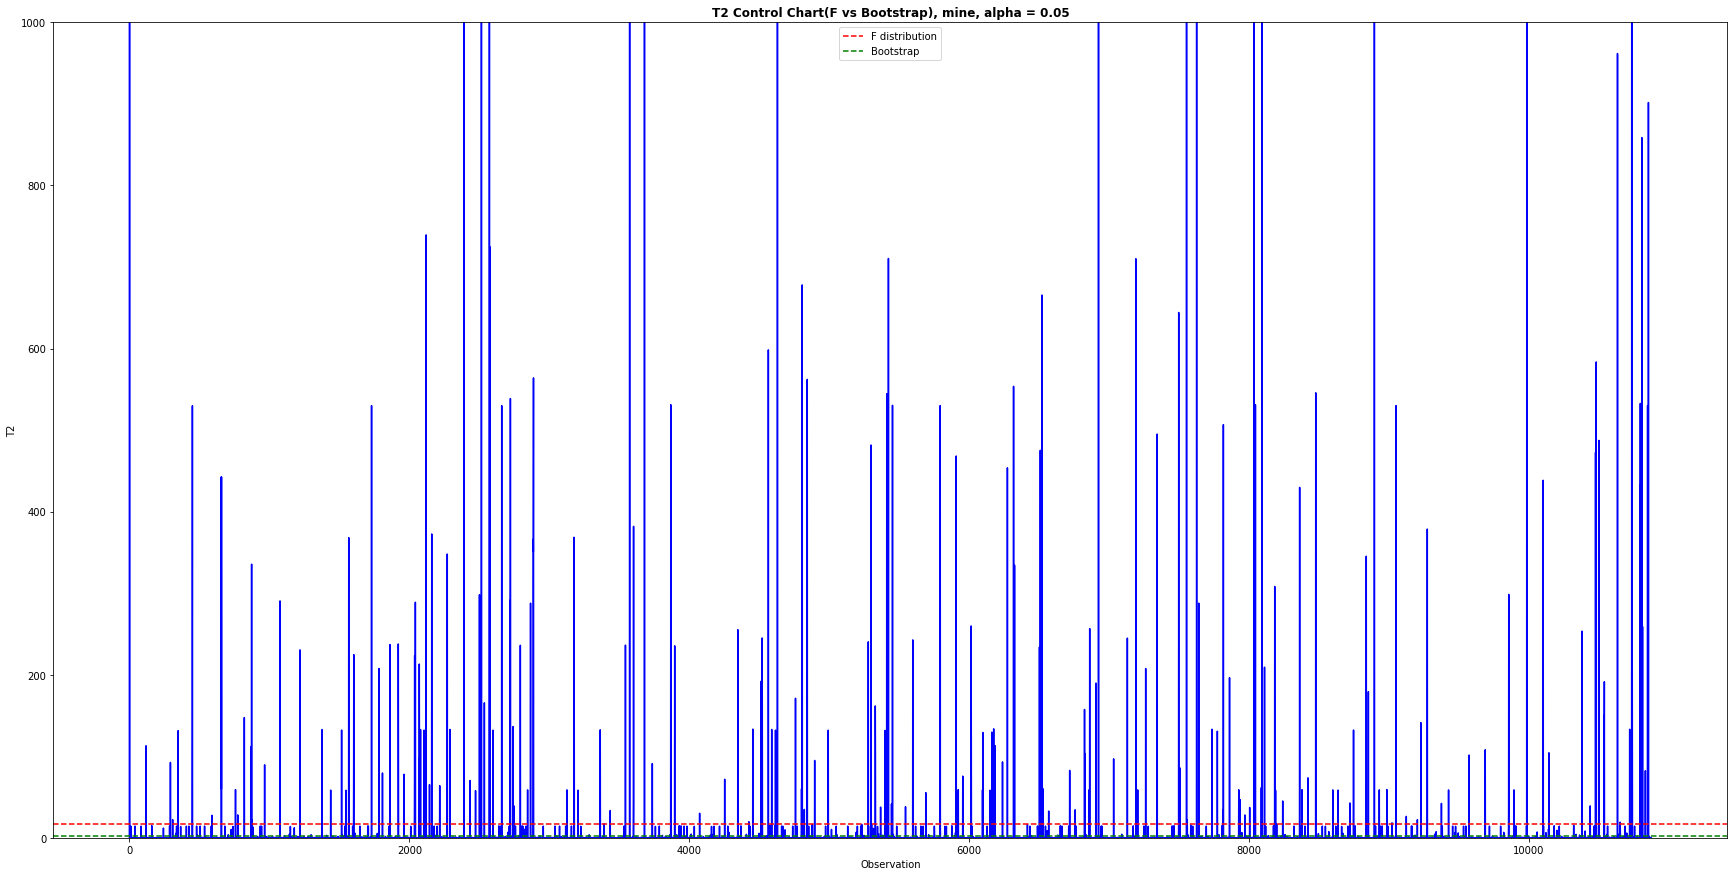

---------- False alarm with F distribution ----------
Expected false alarm rate: 0.05
Data false alarm rate: 0.021519220158175464
---------- False alarm with Bootstrap ----------
Expected false alarm rate: 0.05
Data false alarm rate: 0.04818833915762369


In [59]:
t2_control_limit(df_3,alpha= 0.05 , data_dist_name='mine')

In [ ]:
df_3.cov().inv()

In [83]:
df_3.agg(['mean']).T.values

array([[1.90270370e-01],
       [1.50106797e+08],
       [3.52524983e+04],
       [1.77174681e+08],
       [3.44417814e+04],
       [9.88092269e+07],
       [9.97241126e+01],
       [3.08993930e-02],
       [3.86242413e-03]])

In [89]:
t,lcl , ucl = t_square(df_3,0.05)